In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import sys
!{sys.executable} -m pip install geocoder

In [6]:
#Create data frame with the Delhi data
import pandas as pd
df1 = pd.read_csv('/resources/labs/DP0701EN/datasets_512081_944688_delhi_dataSet.csv')
df1.head()
df1.shape
df2 = df1.dropna()
df2.shape
# df2.head()
df3 = df2[['Borough', 'Neighborhood', 'latitude', 'longitude']]
# df3.head()
# df3.dtypes
df4 = df3[(df3['latitude']>0) & (df3['longitude']>0)]
# df4
neighborhoods = df4
neighborhoods.head()
# neighborhoods['latitude']
# df4 = df3[df3['Neighborhood'] == 'Adarsh Nagar']
# df3.iloc[4,3]
# df4 = df3[df3['longitude']>0]
# df4.head()
# df5 = df4[df4['latitude']>0]
# df5.head()

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


(185, 5)

(163, 5)

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
6,North West Delhi,Jahangirpuri,28.725972,77.162658


In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 9 boroughs and 153 neighborhoods.


In [8]:
address = 'New Delhi, India'

geolocator = Nominatim(user_agent="trnt_explorer")
location = geolocator.geocode(address)
print(location)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New Delhi are {}, {}.'.format(latitude, longitude))

New Delhi, Delhi, India
The geograpical coordinates of New Delhi are 28.6138954, 77.2090057.


In [9]:
# create map of New Delhi using latitude and longitude values
map_Delhi = folium.Map(location=[latitude, longitude], zoom_start=10)

#Add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['latitude'], neighborhoods['longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Delhi) 
    
map_Delhi


In [10]:
CLIENT_ID = 'IJFLQV3IMIWD4YD52201FQZKKPXPVIS5P5M4K00ALNGY5TLE' # your Foursquare ID
CLIENT_SECRET = 'EMLUFXPWEFTPJU4KXN52RONCRSA4OX1SMIT3Q0O2TVB3X5IF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IJFLQV3IMIWD4YD52201FQZKKPXPVIS5P5M4K00ALNGY5TLE
CLIENT_SECRET:EMLUFXPWEFTPJU4KXN52RONCRSA4OX1SMIT3Q0O2TVB3X5IF


In [12]:
DelhiNW_data = neighborhoods[neighborhoods['Borough'] == 'South Delhi'].reset_index(drop=True)
DelhiNW_data.head(10)
DelhiNW_data.shape

,Borough,Neighborhood,latitude,longitude
0,South Delhi,Alaknanda,28.529336,77.251632
1,South Delhi,Chhattarpur,28.507007,77.175417
2,South Delhi,Chittaranjan Park,28.538752,77.249249
3,South Delhi,Dayanand Colony,28.562200,77.247613
4,South Delhi,Defence Colony,28.571791,77.232010
5,South Delhi,East of Kailash,28.557032,77.244614
6,South Delhi,Friends Colony,28.566751,77.261918
7,South Delhi,Greater Kailash,28.554633,77.228570
8,South Delhi,Green Park,28.558002,77.206821
9,South Delhi,Gulmohar Park,28.557101,77.213006


(43, 4)

In [13]:
address = 'New Delhi, India'

geolocator = Nominatim(user_agent="trnt_explorer")
location = geolocator.geocode(address)
print(location)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of New Delhi are {}, {}.'.format(latitude, longitude))

New Delhi, Delhi, India
The geograpical coordinates of New Delhi are 28.6138954, 77.2090057.


In [14]:
# create map of NW Delhi using latitude and longitude values
map_NWDelhi = folium.Map(location=[latitude, longitude], zoom_start=10)

#Add markers to map
for lat, lng, borough, neighborhood in zip(DelhiNW_data['latitude'], DelhiNW_data['longitude'], DelhiNW_data['Borough'], DelhiNW_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NWDelhi) 
    
map_NWDelhi

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
DelhiNW_venues = getNearbyVenues(names=DelhiNW_data['Neighborhood'],
                                   latitudes=DelhiNW_data['latitude'],
                                   longitudes=DelhiNW_data['longitude']
                                  )

Alaknanda
Chhattarpur
Chittaranjan Park
Dayanand Colony
Defence Colony
East of Kailash
Friends Colony
Greater Kailash
Green Park
Gulmohar Park
Hauz Khas
Hauz Khas Village
Jaitpur
Jangpura
Jasola
Jor Bagh
Kailash Colony
Khanpur
Khirki Village
Lajpat Nagar
Lodi Colony
Maharani Bagh
Malviya Nagar
Mehrauli
Neeti Bagh
Nehru Place
Netaji Nagar
New Friends Colony
Nizamuddin West
Okhla
Safdarjung Enclave
Sainik Farm
Saket
Sangam Vihar
Sarita Vihar
Sarojini Nagar
Sarvodaya Enclave
Shahpur Jat
Siri Fort
South Extension
Sriniwaspuri
Tughlaqabad
Badarpur


In [18]:
DelhiNW_venues.head()
DelhiNW_venues.columns

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alaknanda,28.529336,77.251632,City Of Joy,28.532685,77.253003,Restaurant
1,Alaknanda,28.529336,77.251632,Starbucks,28.534053,77.243059,Coffee Shop
2,Alaknanda,28.529336,77.251632,Culinaire,28.530777,77.245816,Thai Restaurant
3,Alaknanda,28.529336,77.251632,Yeti - The Himalayan Kitchen,28.533562,77.242361,Tibetan Restaurant
4,Alaknanda,28.529336,77.251632,Chocolateria San Churro,28.534612,77.243642,Dessert Shop


Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [19]:
DelhiNW_venues= DelhiNW_venues[(DelhiNW_venues['Venue Category'].str.contains('Restaurant')) & (DelhiNW_venues['Venue Category'] !=('Restaurant'))]
DelhiNW_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
2,Alaknanda,28.529336,77.251632,Culinaire,28.530777,77.245816,Thai Restaurant
3,Alaknanda,28.529336,77.251632,Yeti - The Himalayan Kitchen,28.533562,77.242361,Tibetan Restaurant
5,Alaknanda,28.529336,77.251632,China Garden,28.532931,77.243214,Chinese Restaurant
7,Alaknanda,28.529336,77.251632,Artusi Ristorante e Bar,28.533452,77.242032,Italian Restaurant
9,Alaknanda,28.529336,77.251632,Amalfi,28.532367,77.242859,Italian Restaurant


In [20]:
DelhiNW_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alaknanda,19,19,19,19,19,19
Chhattarpur,9,9,9,9,9,9
Chittaranjan Park,27,27,27,27,27,27
Dayanand Colony,30,30,30,30,30,30
Defence Colony,35,35,35,35,35,35
East of Kailash,30,30,30,30,30,30
Friends Colony,12,12,12,12,12,12
Greater Kailash,23,23,23,23,23,23
Green Park,30,30,30,30,30,30


In [21]:
print('There are {} uniques categories.'.format(len(DelhiNW_venues['Venue Category'].unique())))

There are 34 uniques categories.


In [21]:
DelhiNW_venues['Venue Category'].unique()

array(['Thai Restaurant', 'Tibetan Restaurant', 'Chinese Restaurant',
       'Italian Restaurant', 'Indian Restaurant', 'Asian Restaurant',
       'French Restaurant', 'Fast Food Restaurant',
       'Mediterranean Restaurant', 'Japanese Restaurant',
       'Bengali Restaurant', 'Australian Restaurant',
       'South Indian Restaurant', 'English Restaurant',
       'Modern European Restaurant', 'Eastern European Restaurant',
       'Middle Eastern Restaurant', 'Vegetarian / Vegan Restaurant',
       'Korean Restaurant', 'American Restaurant', 'Tapas Restaurant',
       'Turkish Restaurant', 'Scandinavian Restaurant',
       'Mexican Restaurant', 'Burmese Restaurant', 'Mughlai Restaurant',
       'North Indian Restaurant', 'Comfort Food Restaurant',
       'Falafel Restaurant', 'Tex-Mex Restaurant',
       'Northeast Indian Restaurant', 'Seafood Restaurant',
       'New American Restaurant'], dtype=object)

In [22]:
# one hot encoding
DelhiNW_onehot = pd.get_dummies(DelhiNW_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
DelhiNW_onehot['Neighborhood'] = DelhiNW_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [DelhiNW_onehot.columns[-1]] + list(DelhiNW_onehot.columns[:-1])
DelhiNW_onehot = DelhiNW_onehot[fixed_columns]

# DelhiNW_onehot.head();
DelhiNW_grouped = DelhiNW_onehot.groupby('Neighborhood').mean().reset_index()
DelhiNW_grouped.head()
DelhiNW_grouped.shape

,Neighborhood,Afghan Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,Bengali Restaurant,Burmese Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Mughlai Restaurant,North Indian Restaurant,Northeast Indian Restaurant,Scandinavian Restaurant,Seafood Restaurant,South Indian Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Alaknanda,0.000000,0.0,0.157895,0.000000,0.000000,0.0,0.157895,0.0,0.000000,0.000000,0.000000,0.0,0.105263,0.052632,0.263158,0.105263,0.000000,0.0,0.052632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.052632,0.052632,0.0,0.0
1,Chhattarpur,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.0,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.333333,0.222222,0.111111,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000,0.0,0.0
2,Chittaranjan Park,0.000000,0.0,0.111111,0.037037,0.037037,0.0,0.148148,0.0,0.000000,0.000000,0.000000,0.0,0.148148,0.037037,0.259259,0.111111,0.037037,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.037037,0.037037,0.0,0.0
3,Dayanand Colony,0.000000,0.0,0.000000,0.000000,0.033333,0.0,0.066667,0.0,0.000000,0.000000,0.000000,0.0,0.233333,0.033333,0.433333,0.166667,0.033333,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Defence Colony,0.028571,0.0,0.028571,0.000000,0.000000,0.0,0.085714,0.0,0.028571,0.028571,0.028571,0.0,0.114286,0.028571,0.371429,0.171429,0.028571,0.0,0.000000,0.0,0.0,0.028571,0.0,0.0,0.0,0.0,0.0,0.028571,0.0,0.0,0.000000,0.000000,0.0,0.0


(40, 35)

In [24]:
num_top_venues = 5

# for hood in DelhiNW_grouped['Neighborhood']:
#     print("----"+hood+"----");
#     temp = DelhiNW_grouped[DelhiNW_grouped['Neighborhood'] == hood].T.reset_index()
#     temp.columns = ['venue','freq']
#     temp = temp.iloc[1:]
#     temp['freq'] = temp['freq'].astype(float)
#     temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = DelhiNW_grouped['Neighborhood']

for ind in np.arange(DelhiNW_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(DelhiNW_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Alaknanda,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant
1,Chhattarpur,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant
2,Chittaranjan Park,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
3,Dayanand Colony,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant
4,Defence Colony,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<Figure size 360x216 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

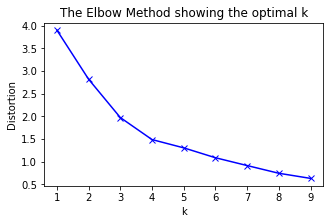

In [25]:
#Elbow chart for optimizing K
import matplotlib.pyplot as plt
DelhiNW_grouped_clustering1 = DelhiNW_grouped.drop('Neighborhood', 1)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(DelhiNW_grouped_clustering1)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [26]:
# set number of clusters
kclusters = 5

DelhiNW_grouped_clustering1 = DelhiNW_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(DelhiNW_grouped_clustering1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

DelhiNW_merged = DelhiNW_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
DelhiNW_merged = DelhiNW_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# DelhiNW_merged # check the last columns!
type(DelhiNW_merged)
DelhiNW_merged.shape
#-------------------------------------------------------------------------------------------------------------------------
type(DelhiNW_merged)
DelhiNW_merged = DelhiNW_merged.dropna()  # check the last columns!
DelhiNW_merged.shape
DelhiNW_merged.head(2)
DelhiNW_merged = DelhiNW_merged.astype({'Cluster Labels': 'int32'})
DelhiNW_merged.head()

array([0, 3, 0, 3, 3, 3, 3, 3, 0, 0], dtype=int32)

pandas.core.frame.DataFrame

(43, 10)

pandas.core.frame.DataFrame

(40, 10)

,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,South Delhi,Alaknanda,28.529336,77.251632,0.0,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant
1,South Delhi,Chhattarpur,28.507007,77.175417,3.0,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant


,Borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,South Delhi,Alaknanda,28.529336,77.251632,0,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant
1,South Delhi,Chhattarpur,28.507007,77.175417,3,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant
2,South Delhi,Chittaranjan Park,28.538752,77.249249,0,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
3,South Delhi,Dayanand Colony,28.562200,77.247613,3,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant
4,South Delhi,Defence Colony,28.571791,77.232010,3,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant


In [27]:
#--------------------------------------------------------------------------------------------------------------------------
# create map for clusters
print(kclusters)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(DelhiNW_merged['latitude'], DelhiNW_merged['longitude'], DelhiNW_merged['Neighborhood'], DelhiNW_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

5


['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

In [28]:
type(DelhiNW_merged)
DelhiNW_merged = DelhiNW_merged.dropna()  
DelhiNW_merged.shape

pandas.core.frame.DataFrame

(40, 10)

In [30]:
DelhiNW_merged.loc[DelhiNW_merged['Cluster Labels'] == 0, DelhiNW_merged.columns[[1] + list(range(5, DelhiNW_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Alaknanda,Indian Restaurant,Chinese Restaurant,Asian Restaurant,Fast Food Restaurant,Italian Restaurant
2,Chittaranjan Park,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant
8,Green Park,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Asian Restaurant,Mediterranean Restaurant
9,Gulmohar Park,Indian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Italian Restaurant,Japanese Restaurant
10,Hauz Khas,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Japanese Restaurant
11,Hauz Khas Village,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Italian Restaurant,American Restaurant
15,Jor Bagh,Indian Restaurant,Eastern European Restaurant,Chinese Restaurant,Japanese Restaurant,Fast Food Restaurant
18,Khirki Village,Indian Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Fast Food Restaurant
20,Lodi Colony,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Mediterranean Restaurant,Japanese Restaurant
22,Malviya Nagar,Indian Restaurant,Chinese Restaurant,Asian Restaurant,American Restaurant,Fast Food Restaurant


In [31]:
DelhiNW_merged.loc[DelhiNW_merged['Cluster Labels'] == 1, DelhiNW_merged.columns[[1] + list(range(5, DelhiNW_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Khanpur,Thai Restaurant,Vegetarian / Vegan Restaurant,Comfort Food Restaurant,French Restaurant,Fast Food Restaurant


In [33]:
DelhiNW_merged.loc[DelhiNW_merged['Cluster Labels'] == 2, DelhiNW_merged.columns[[1] + list(range(5, DelhiNW_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Jasola,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,French Restaurant,Fast Food Restaurant
34,Sarita Vihar,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,French Restaurant,Fast Food Restaurant


In [34]:
DelhiNW_merged.loc[DelhiNW_merged['Cluster Labels'] == 3, DelhiNW_merged.columns[[1] + list(range(5, DelhiNW_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Chhattarpur,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Japanese Restaurant,Thai Restaurant
3,Dayanand Colony,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant
4,Defence Colony,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant
5,East of Kailash,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant
6,Friends Colony,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Chinese Restaurant
7,Greater Kailash,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Australian Restaurant
13,Jangpura,Indian Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Japanese Restaurant
16,Kailash Colony,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,French Restaurant
19,Lajpat Nagar,Indian Restaurant,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Bengali Restaurant
21,Maharani Bagh,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant


In [35]:
DelhiNW_merged.loc[DelhiNW_merged['Cluster Labels'] == 4, DelhiNW_merged.columns[[1] + list(range(5, DelhiNW_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,Mehrauli,Thai Restaurant,Italian Restaurant,Japanese Restaurant,Indian Restaurant,Asian Restaurant
